In [107]:
import numpy as np
import scipy as sc
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import odr
from scipy import stats 
plt.style.use('default')

In [108]:
data = ascii.read("Lab4.csv")

In [109]:
Time = data.columns[0]
Channel_1 = data.columns[1]
Channel_2 = data.columns[2]

Text(0.5, 1.0, 'Time vs Amplitude')

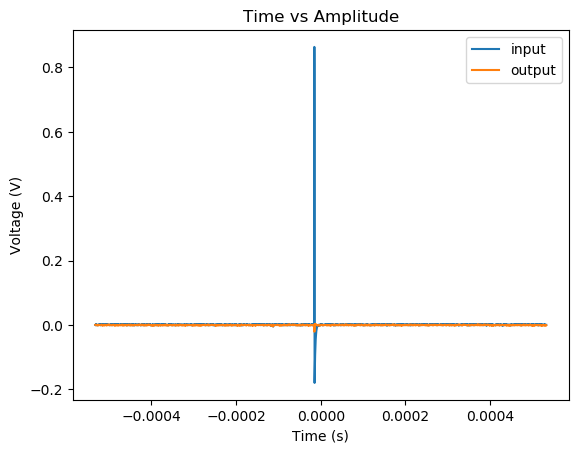

In [110]:
fig = plt.figure()
plt.plot(Time[2:],Channel_1[2:], label= 'input') 
plt.plot(Time[2:],Channel_2[2:], label= 'output')
plt.legend()
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.title("Time vs Amplitude")

In [125]:
xdata = np.fft.fftfreq(8192, ((np.max(Time)-np.min(Time))/(8192-1)))
Output_real = np.real(np.fft.fft(np.fft.fftshift(Channel_2)))
Input_real = np.real(np.fft.fft(np.fft.fftshift(Channel_1)))

Output_imag = np.imag(np.fft.fft(np.fft.fftshift(Channel_2)))
Input_imag = np.imag(np.fft.fft(np.fft.fftshift(Channel_1)))


#cha1=np.fft.fft(Channel_1[2:])
#cha1real=cha1.real
#cha1imag=cha1.imag
#freq=np.fft.fftfreq(8190,0.000125)

#cha2=np.fft.fft(Channel_2[2:])
#cha2real=cha2.real
#cha2imag=cha2.imag

Text(0.5, 1.0, 'Frequency Domain')

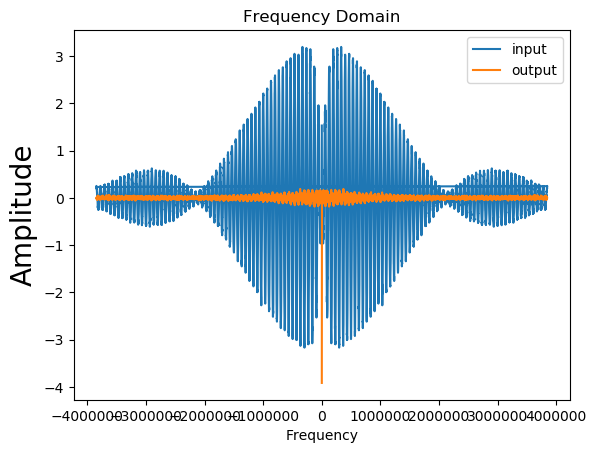

In [126]:
plt.figure()
plt.plot(xdata,Input_real, label = 'input')
plt.plot(xdata,Output_real, label = 'output' )
plt.legend()
plt.ylabel('Amplitude', fontsize = 20)
plt.xlabel('Frequency')
plt.title("Frequency Domain")

Text(0.5, 1.0, 'Frequency Domain')

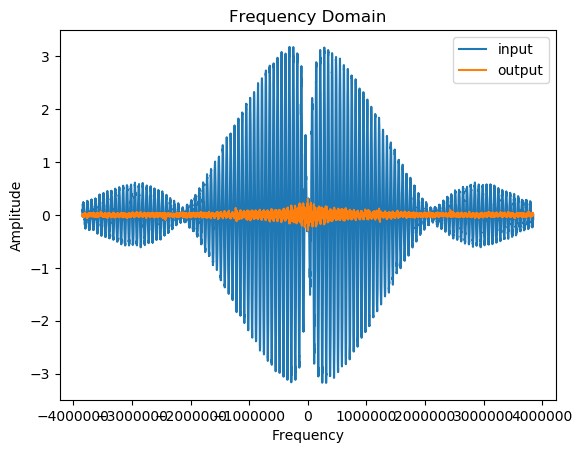

In [127]:
plt.figure()
plt.plot(xdata,Input_imag, label = 'input')
plt.plot(xdata,Output_imag, label = 'output' )
plt.legend()
plt.ylabel('Amplitude', fontsize = 10)
plt.xlabel('Frequency')
plt.title("Frequency Domain")

Text(0, 0.5, 'Imaginary part of Fourier Transformed data')

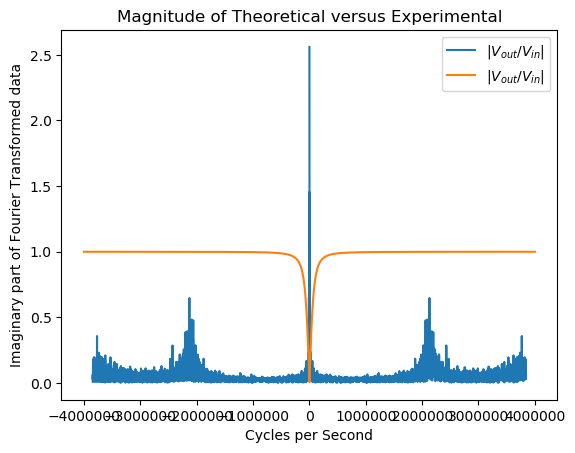

In [133]:
R = 200
C = 10*10**-9
freqarray = np.linspace(-4*10**6, 4*10**6, 8192)

mag = np.abs(np.fft.fft(np.fft.fftshift(Channel_2)))/np.abs(np.fft.fft(np.fft.fftshift(Channel_1)))
plt.close()
fig = plt.figure()
plt.plot(xdata, mag, label= '$|V_{out}/V_{in}|$')
plt.plot(freqarray, np.sqrt(R**2/(R**2+1/(2*np.pi*freqarray)**2/C**2)), label= '$|V_{out}/V_{in}|$')
plt.legend()
plt.title('Magnitude of Theoretical versus Experimental')
plt.xlabel('Cycles per Second')
plt.ylabel('Imaginary part of Fourier Transformed data')

Text(0, 0.5, 'Imaginary part of Fourier Transformed data')

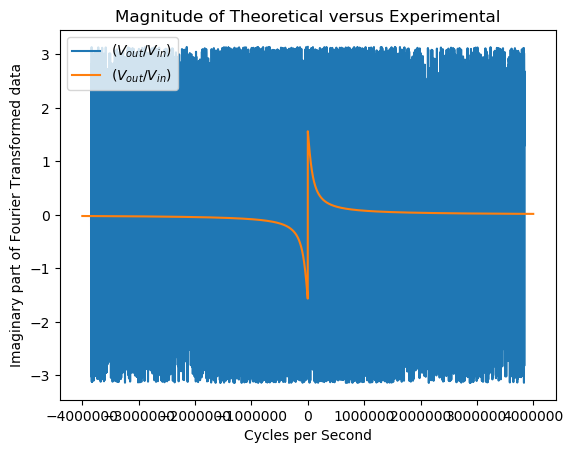

In [141]:
fig = plt.figure()

phase = np.angle((np.fft.fft(np.fft.fftshift(Channel_2)))/(np.fft.fft(np.fft.fftshift(Channel_1))))

plt.plot(xdata, phase, label='$(V_{out}/V_{in})$')
plt.plot(freqarray,np.angle(R/(R+1/(1j*2*np.pi*freqarray*C))),label='$(V_{out}/V_{in})$')
plt.legend()

plt.title('Magnitude of Theoretical versus Experimental')
plt.xlabel('Cycles per Second')
plt.ylabel('Imaginary part of Fourier Transformed data')

Text(0, 0.5, 'Voltage (Volts)')

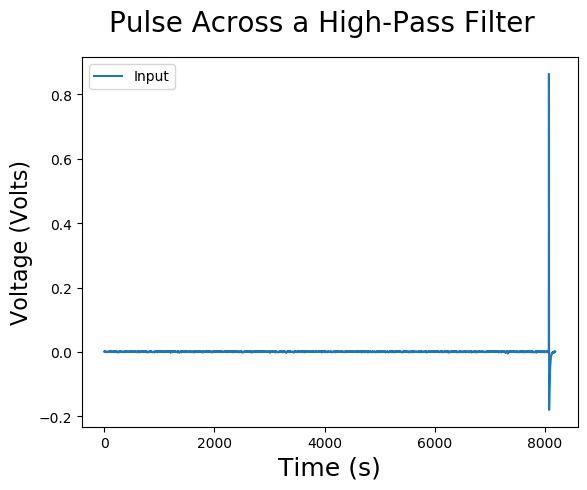

In [130]:
fig = plt.figure()
plt.plot(np.fft.fftshift(Channel_1), label='Input')
plt.legend()
fig.suptitle('Pulse Across a High-Pass Filter', fontsize=20)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Voltage (Volts)', fontsize=16)